In [1]:
import pandas as pd
from os import listdir

#### Merging 12 months of sales data into a single file

In [3]:
path_files = 'SalesAnalysis/Sales_Data'
files_csv = [filename for filename in listdir(path_files) if filename.endswith('.csv')]

In [4]:
df_total = pd.DataFrame()
for file_csv in files_csv:
        df_total = pd.concat([df_total, pd.read_csv(os.path.join(path_files, file_csv))], ignore_index=True)


In [5]:
df_total.to_csv('Todos_los_datos.csv', index=False)

In [13]:
df_new = pd.read_csv('Todos_los_datos.csv')
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Eliminar Nan

In [14]:
df_new_wonan = df_new.dropna()

## What was the best month for sales? How much was earned that month?

In [15]:
df_new_wonan['Month'] = df_new_wonan['Order Date'].str[0:2]

In [16]:
df_new_wonan = df_new_wonan[df_new_wonan['Order Date'].str[0:2] != 'Or']

In [17]:
df_new_wonan['Month'] = df_new_wonan['Month'].astype(int)

In [18]:
df_new_wonan['Quantity Ordered'] = pd.to_numeric(df_new_wonan['Quantity Ordered'])
df_new_wonan['Price Each'] = pd.to_numeric(df_new_wonan['Price Each'])

In [19]:
df_new_wonan.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [22]:
df_new_wonan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
df_new_wonan['Sales'] = df_new_wonan['Quantity Ordered']*df_new_wonan['Price Each']

In [30]:
df_new_wonan.groupby('Month')['Sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Months')

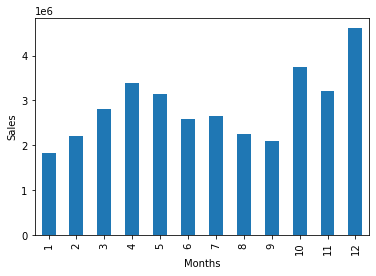

In [27]:
df_new_wonan.groupby('Month')['Sales'].sum().plot(kind='bar')
plt.ylabel('Sales')
plt.xlabel('Months')

## What city is the one who make more sales

In [31]:
df_new_wonan['City'] = df_new_wonan['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2][1:3]})")

In [33]:
df_new_wonan.groupby('City')['Sales'].sum()

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

<AxesSubplot:xlabel='City'>

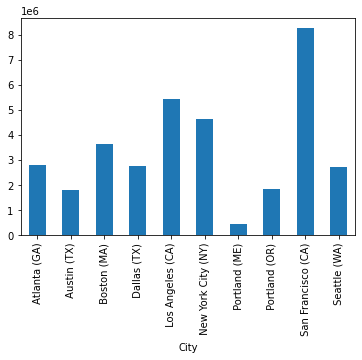

In [34]:
df_new_wonan.groupby('City')['Sales'].sum().plot(kind='bar')

## What time should we display advertisements to maximize likelihood of costumer's buying products?

In [36]:
df_new_wonan['Order Date'] = pd.to_datetime(df_new_wonan['Order Date'])

In [37]:
df_new_wonan.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [38]:
df_new_wonan['Hour'] = df_new_wonan['Order Date'].dt.hour

In [39]:
df_new_wonan.groupby('Hour')['Sales'].sum()

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Hour'>

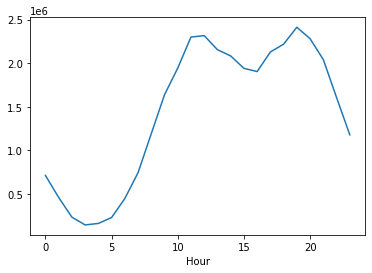

In [46]:
df_new_wonan.groupby(['Hour'])['Sales'].sum().plot()

In [53]:
hours = df_new_wonan['Hour'].unique()
hours = hours.sort()

Text(0, 0.5, 'Sales')

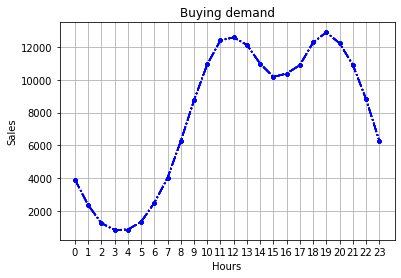

In [69]:
plt.plot(hours, df_new_wonan.groupby(['Hour']).count(), marker= '.', linestyle='-.', color='b')
plt.title('Buying demand')
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales')

## What products are most often sold together

In [84]:
lista_duplicados = df_new_wonan[df_new_wonan['Order ID'].duplicated()]['Order ID'].unique()

In [86]:
df_duplicados = df_new_wonan[df_new_wonan['Order ID'].isin(lista_duplicados)]

In [98]:
agrupations = df_duplicados.groupby('Order ID')['Product'].apply(','.join)

In [99]:
from itertools import combinations
from collections import Counter

In [108]:
counter = Counter()

for items in agrupations:
    item_list = items.split(',')
    counter.update(combinations(item_list, 1))

In [109]:
counter.most_common(10)

[(('USB-C Charging Cable',), 2111),
 (('iPhone',), 1867),
 (('Lightning Charging Cable',), 1827),
 (('Wired Headphones',), 1674),
 (('Google Phone',), 1639),
 (('Apple Airpods Headphones',), 974),
 (('Bose SoundSport Headphones',), 820),
 (('AAA Batteries (4-pack)',), 815),
 (('AA Batteries (4-pack)',), 768),
 (('Vareebadd Phone',), 601)]

## What product sold the most? Why do you think it sold the most?

In [136]:
most_sold = df_new_wonan.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [137]:
product_list = most_sold.Product.tolist()

Text(0.5, 0, 'Product')

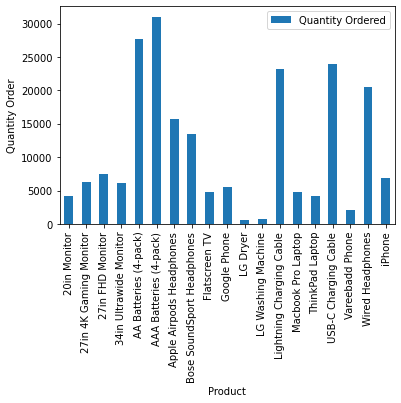

In [138]:
most_sold.plot(kind='bar')
plt.xticks(range(len(product_list)), product_list)
plt.ylabel('Quantity Order')
plt.xlabel('Product')

In [139]:
mean_price = df_new_wonan.groupby('Product')['Price Each'].mean().reset_index()

In [142]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(most_sold, product_list)
plt.xticks(range(len(product_list)), product_list)
plt.ylabel('Quantity Order')
plt.xlabel('Product')

TypeError: unhashable type: 'numpy.ndarray'